<a href="https://colab.research.google.com/github/Akshay091203/DAV/blob/main/22_DAV_EXP_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aim : Multiple Linear Regression in Python and R**

Lab Outcome : Implement various Regression techniques for prediction.

# **Tasks to be Performed :**

1. Explore Python Libraries and perform Multiple Regression.
2. Explore R libraries and perform Multiple Regression.



# **Multiple Linear Regression in Python:**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.stats import boxcox
from scipy.special import inv_boxcox
import warnings


In [4]:
#make a dataframe
df = pd.read_csv("/content/Student_Performance.csv")


In [5]:
#number of columns and rows in dataset
df.shape

(10000, 6)

In [6]:
#information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [7]:
#statistical information about dataset
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [8]:
#check if there are any null values, luckily no null values in my case
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [9]:
#we see that extracirricular activities have categorical values: yes and no
#yes = 1
#no = 0
df['Extracurricular Activities'] = df['Extracurricular Activities'].replace({'Yes': 1, 'No': 0})
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


In [10]:
#we can now see that Extra cirricular activites is of type int
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  int64  
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


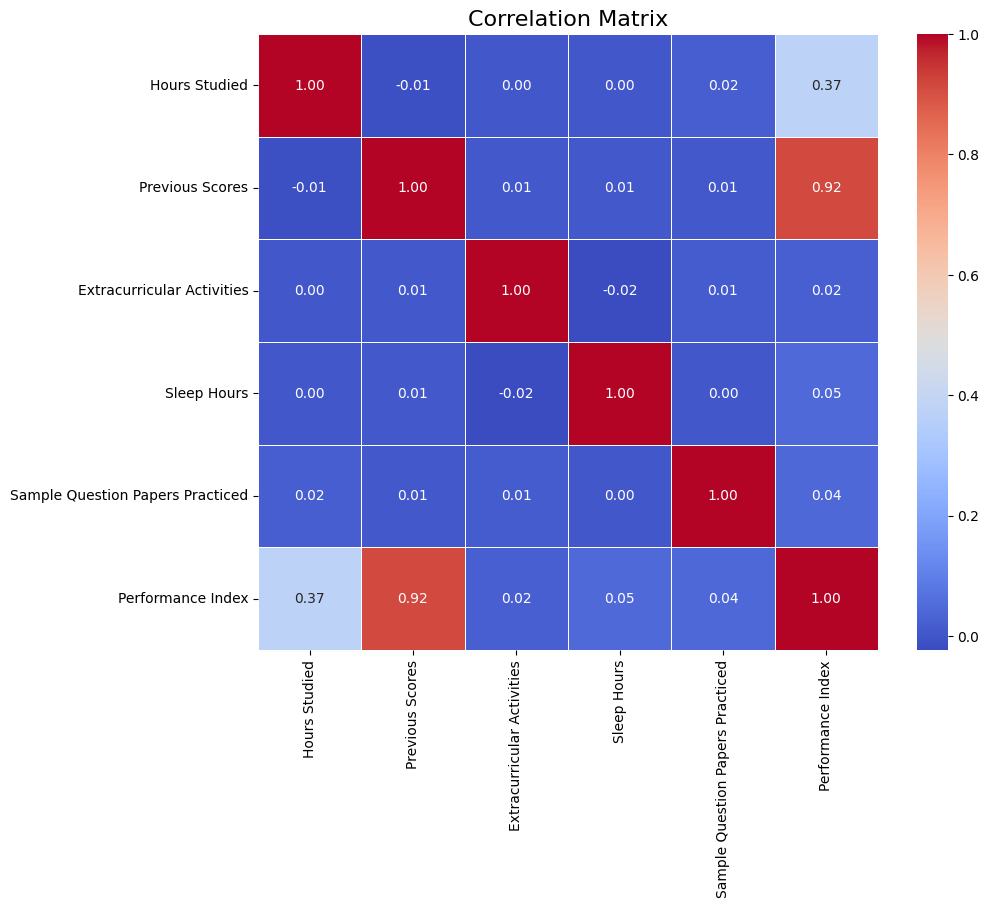

In [11]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [12]:
#dependent variable
y = df['Performance Index']
y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

In [13]:
#independent variables
X = df.drop(['Performance Index','Extracurricular Activities','Previous Scores', 'Sample Question Papers Practiced'], axis=1)
X

,Hours Studied,Sleep Hours
0,7,9
1,4,4
2,8,7
3,5,5
4,7,8
...,...,...
9995,1,4
9996,7,8
9997,6,8
9998,9,7


In [14]:
#split the dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
#create a model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
#finding the slope and intercept
intercept = model.intercept_
coefficients = model.coef_
print(f'Intercept: {intercept:.2f}')
print('Coefficients:')
for i, coef in enumerate(coefficients):
    print(f'   Coefficient for X{i + 1}: {coef:.2f}')

Intercept: 38.36
Coefficients:
   Coefficient for X1: 2.78
   Coefficient for X2: 0.47


In [18]:
y_pred = model.predict(X_test)
#the results:
y_pred

array([56.04595213, 45.81311184, 61.1384375 , ..., 47.22808215,
       50.01015322, 56.04595213])

In [19]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 320.25229620118694


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


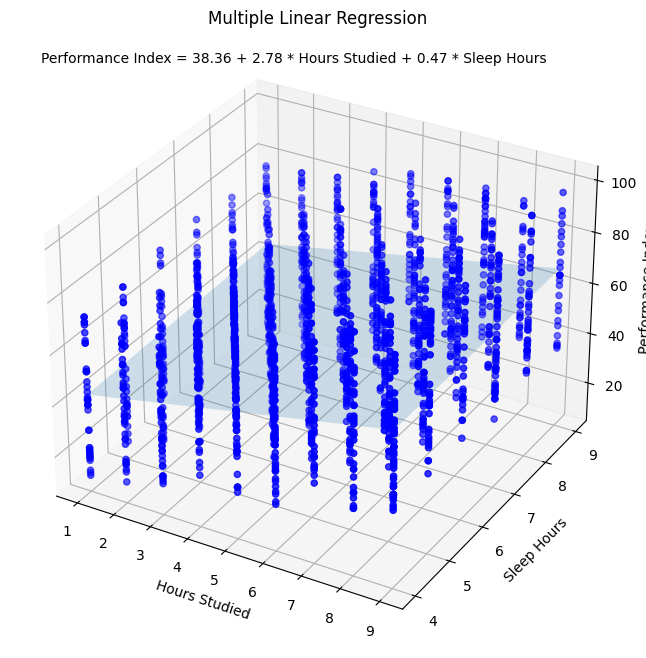

In [27]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the data
ax.scatter(X_test['Hours Studied'], X_test['Sleep Hours'], y_test, c='blue', marker='o')

# Surface plot of the regression plane
x_surf, y_surf = np.meshgrid(np.linspace(X_test['Hours Studied'].min(), X_test['Hours Studied'].max()),
                             np.linspace(X_test['Sleep Hours'].min(), X_test['Sleep Hours'].max()))
z_surf = model.predict(np.c_[x_surf.ravel(), y_surf.ravel()])
z_surf = z_surf.reshape(x_surf.shape)
ax.plot_surface(x_surf, y_surf, z_surf, alpha=0.2)

# Labels and title
ax.set_xlabel('Hours Studied')
ax.set_ylabel('Sleep Hours')
ax.set_zlabel('Performance Index')
ax.set_title('Multiple Linear Regression')

# Finding the slope and intercept
intercept = model.intercept_
coefficients = model.coef_

# Format equation
equation = f'Performance Index = {intercept:.2f} + {coefficients[0]:.2f} * Hours Studied + {coefficients[1]:.2f} * Sleep Hours'

# Add equation to the plot
ax.text2D(0.05, 0.95, equation, transform=ax.transAxes)

# Show the plot
plt.show()

# **Multiple Linear Regression in R:**

In [30]:
#initialising the libraries
library(ggplot2)
library(dplyr)
library(broom)

In [31]:
#creating a dataframe
csv_file_path <- "Student_Performance.csv"
my_data <- read.csv(csv_file_path)
str(my_data)

'data.frame':	10000 obs. of  6 variables:
 $ Hours.Studied                   : int  7 4 8 5 7 3 7 8 5 4 ...
 $ Previous.Scores                 : int  99 82 51 52 75 78 73 45 77 89 ...
 $ Extracurricular.Activities      : chr  "Yes" "No" "Yes" "Yes" ...
 $ Sleep.Hours                     : int  9 4 7 5 8 9 5 4 8 4 ...
 $ Sample.Question.Papers.Practiced: int  1 2 2 2 5 6 6 6 2 0 ...
 $ Performance.Index               : num  91 65 45 36 66 61 63 42 61 69 ...


In [32]:
library(ggplot2)

In [33]:
my_data

Hours.Studied,Previous.Scores,Extracurricular.Activities,Sleep.Hours,Sample.Question.Papers.Practiced,Performance.Index
<int>,<int>,<chr>,<int>,<int>,<dbl>
7,99,Yes,9,1,91
4,82,No,4,2,65
8,51,Yes,7,2,45
5,52,Yes,5,2,36
7,75,No,8,5,66
3,78,No,9,6,61
7,73,Yes,5,6,63
8,45,Yes,4,6,42
5,77,No,8,2,61


In [37]:
#extracirricular activites is categorical, we are going to convert it into numeric va;ues
my_data$Extracurricular.Activities <- ifelse(my_data$Extracurricular.Activities == "Yes", 1, 0)

In [38]:
install.packages("caTools")
library(caTools)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [39]:
Y_test <- my_data %>%
    select(Performance.Index)

In [40]:
X <- subset(my_data, select = -Performance.Index)
y <- data.frame(Y = my_data$Performance.Index)

In [43]:
set.seed(123)
split <- sample.split(y$Y, SplitRatio = 0.7)

#training and testing datasets for X
x_train <- subset(X, split == TRUE)
x_test <- subset(X, split == FALSE)

#training and testing datasets for Y
y_train <- subset(y, split == TRUE)
y_test <- subset(y, split == FALSE)

In [44]:
model <- lm(Y ~ ., data = cbind(y_train, x_train))

In [46]:
summary(model)
predictions <- predict(model, newdata = x_test)
# print(predictions)


Call:
lm(formula = Y ~ ., data = cbind(y_train, x_train))

Residuals:
    Min      1Q  Median      3Q     Max 
-7.2813 -1.3665 -0.0067  1.3708  8.4348 

Coefficients: (1 not defined because of singularities)
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      -33.753919   0.150359 -224.49   <2e-16 ***
Hours.Studied                      2.859966   0.009450  302.64   <2e-16 ***
Previous.Scores                    1.018313   0.001411  721.82   <2e-16 ***
Extracurricular.Activities               NA         NA      NA       NA    
Sleep.Hours                        0.467142   0.014416   32.40   <2e-16 ***
Sample.Question.Papers.Practiced   0.207239   0.008553   24.23   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.046 on 6995 degrees of freedom
Multiple R-squared:  0.9887,	Adjusted R-squared:  0.9887 
F-statistic: 1.527e+05 on 4 and 6995 DF,  p-value: < 2.2e-16


In [55]:
install.packages("scatterplot3d")
library(scatterplot3d)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] "Performance Index = 37.86 + 2.77 * Hours Studied + 0.54 * Sleep Hours"


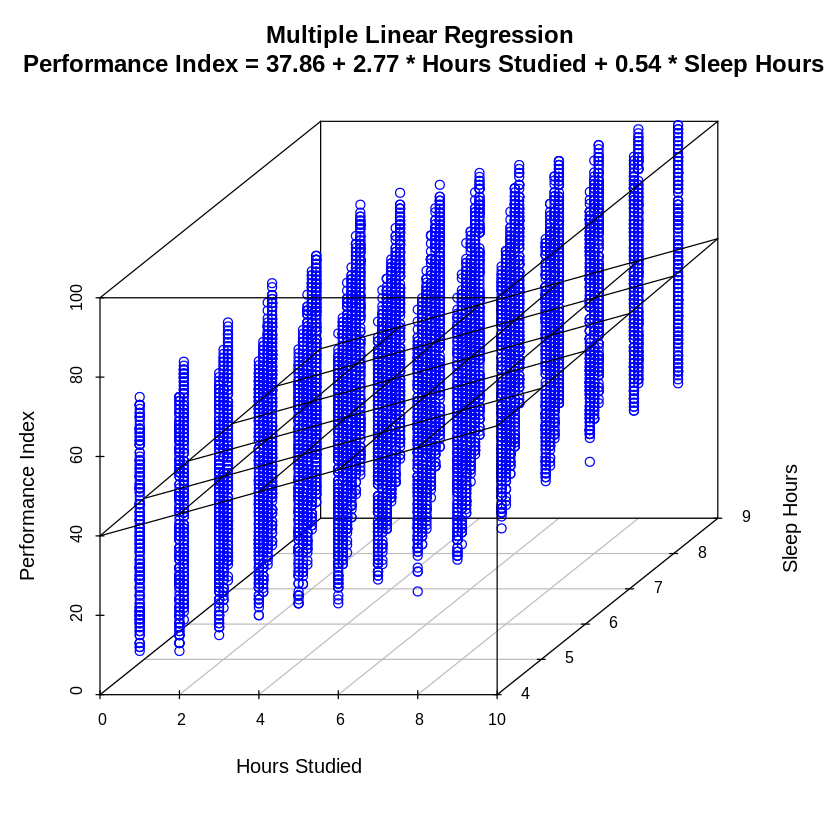

In [64]:
# Load required library
library(scatterplot3d)

# Fit the multiple linear regression model
model <- lm(Performance.Index ~ Hours.Studied + Sleep.Hours, data = my_data)

# Extract coefficients from the model and round them to two digits
coef <- round(coef(model), 2)

# Format the equation with rounded coefficients
equation <- paste("Performance Index =",
                  coef[1],
                  "+",
                  coef[2],
                  "* Hours Studied +",
                  coef[3],
                  "* Sleep Hours")

# Create a title string combining the main title and the equation
plot_title <- paste("Multiple Linear Regression\n", equation)

# Create a 3D scatter plot of the data points with the combined title
s3d <- scatterplot3d(x = my_data$Hours.Studied,
                     y = my_data$Sleep.Hours,
                     z = my_data$Performance.Index,
                     color = "blue",
                     main = plot_title,
                     xlab = "Hours Studied",
                     ylab = "Sleep Hours",
                     zlab = "Performance Index")

# Add fitted regression plane to the plot
s3d$plane3d(model, col = "black", lty = 'solid')

# Print the equation
print(equation)


# **Conclusion:**
1. Understood the concept of Multiple Linear Regression
2. Explored the packages in Python and R
3. Performed Multiple Linear Regression using the Libraries in Python and R

# **Acknowledgement:**
Dataset from: [Kaggle Link](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression?resource=download)